In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
import scipy

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error


In [3]:
!pip install scipy==1.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.1 requires scipy>=1.11.2, but you have scipy 1.11.1 which is incompatible.


In [4]:
!pip install gpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.0 MB/s eta 0:00:00


In [5]:
import GPy

# Composition Space

In [6]:
def concentration_to_ratio(concentration):
  #convert concentration of A to A/B
  B = 1-concentration
  ratio = concentration/B
  return ratio

def ratio_to_concentration(ratio):
  #convert ratio of A/B to concentration of A
  concentration = ratio/(ratio+1)
  return concentration

In [7]:
def gaussian(x, A=1.0, mu=1.0, sigma=1.0):
  y = A * np.exp(-(x-mu)**2/sigma**2)
  return y

def A_target_function(concentration):
  y1 = gaussian(concentration, A= 100, mu = 0.15, sigma = 0.01)
  y2 = gaussian(concentration, A= 40, mu = 1.0, sigma = 1)
  y3 = gaussian(concentration, A= -50, mu = 0.2, sigma = .1)
  y4 = gaussian(concentration, A= -20, mu = 0.6, sigma = .01)
  y5 = gaussian(concentration, A= 20, mu = 1.0, sigma = .01)

  y = y1 + y2 + y3 + y4 + y5
  return y

def B_target_function(concentration):
  #convert the B% to A%
  A_concentration = 1 - concentration

  y = A_target_function(A_concentration)

  return y

def AB_ratio_target_function(ratio):
  #convert the A/B ratio to concentration
  concentration = ratio/(ratio+1)

  y = A_target_function(concentration)

  return y


def BA_ratio_target_function(ratio):
  #convert the B/A ratio to A/B ratio
  AB_ratio = 1/ratio

  y = AB_ratio_target_function(AB_ratio)

  return y

In [8]:
max_AB_ratio = 1000
max_BA_ratio = 1000
max_A_conc = ratio_to_concentration(max_AB_ratio)
min_A_conc = ratio_to_concentration(1/max_AB_ratio)

print("max A concentration: ", max_A_conc)
print("min A concentration: ", min_A_conc)

max A concentration:  0.999000999000999
min A concentration:  0.0009990009990009992


[]

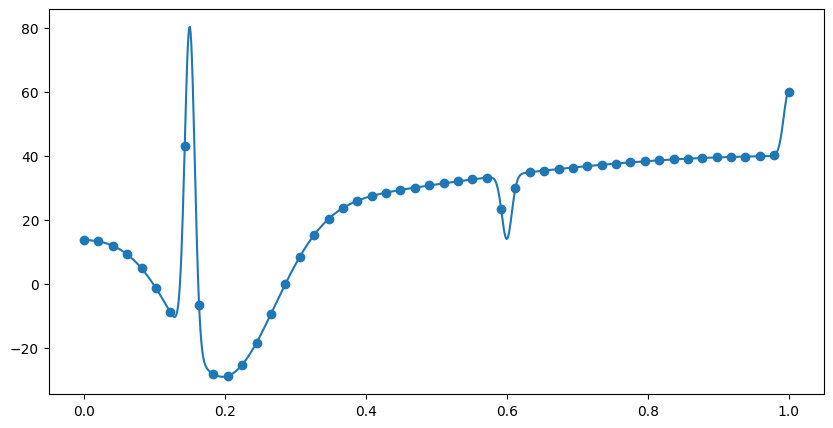

In [9]:
A_comp_points = np.linspace(0, 1, 50)
A_comp_vis = np.linspace(0, 1, 1000)

target = A_target_function(A_comp_points)
target_vis = A_target_function(A_comp_vis)

plt.figure(figsize = (10,5))
plt.scatter(A_comp_points, target)
plt.plot(A_comp_vis, target_vis)
plt.plot()

[]

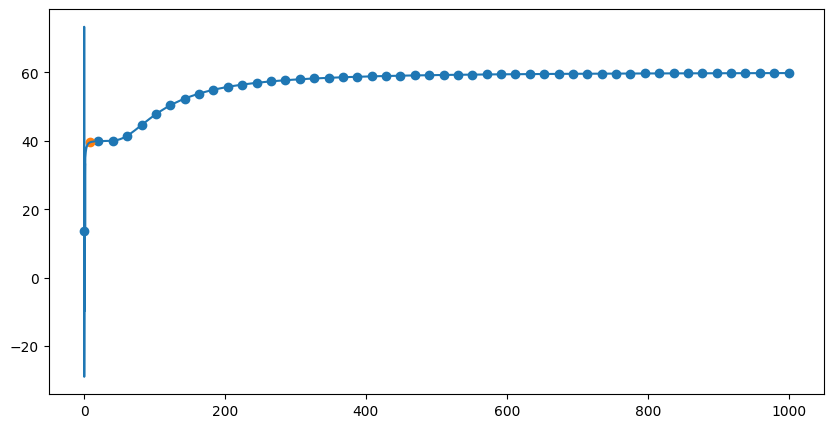

In [10]:
comp_ratio = np.linspace(0, 1000, 50)
comp_ratio_vis = np.linspace(0, 1000, 100000)

conc = 0.9
val_at_conc = A_target_function(conc)

AB_target = AB_ratio_target_function(comp_ratio)
AB_target_vis = AB_ratio_target_function(comp_ratio_vis)

plt.figure(figsize=(10,5))
plt.scatter(comp_ratio, AB_target)
plt.plot(comp_ratio_vis, AB_target_vis)
plt.scatter(concentration_to_ratio(conc), val_at_conc)
plt.plot()

[]

<Figure size 1000x500 with 0 Axes>

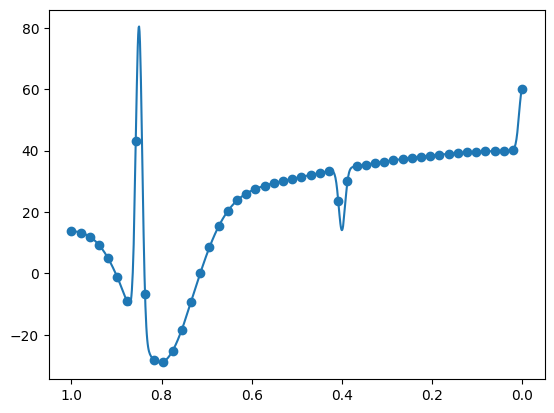

In [11]:
B_comp_points = np.linspace(0, 1, 50)
B_comp_vis = np.linspace(0, 1, 1000)

B_target = B_target_function(B_comp_points)
B_target_vis = B_target_function(B_comp_vis)


plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots(1,1)
ax1.scatter(B_comp_points, B_target)
ax1.plot(B_comp_vis, B_target_vis)
ax1.invert_xaxis()
plt.plot()


 <ipython-input-7-100c84b66982>:34: RuntimeWarning:divide by zero encountered in divide
 <ipython-input-7-100c84b66982>:25: RuntimeWarning:invalid value encountered in divide


[]

<Figure size 1000x500 with 0 Axes>

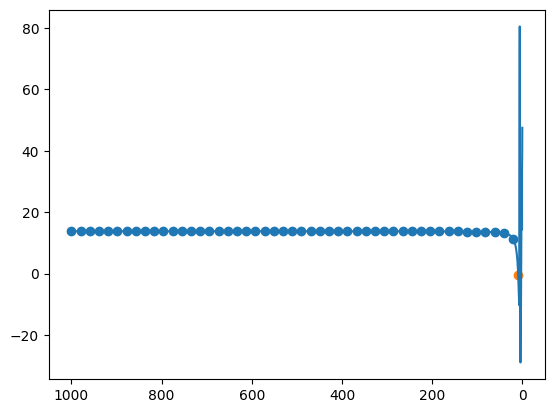

In [12]:
B_comp_ratio = np.linspace(0, 1000, 50)
B_comp_ratio_vis = np.linspace(0, 1000, 100000)

B_conc = 0.9
B_val_at_conc = B_target_function(conc)

BA_target = BA_ratio_target_function(comp_ratio)
BA_target_vis = BA_ratio_target_function(comp_ratio_vis)


plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots(1,1)
ax1.scatter(comp_ratio, BA_target)
ax1.plot(comp_ratio_vis, BA_target_vis)
ax1.scatter(concentration_to_ratio(B_conc), B_val_at_conc)
ax1.invert_xaxis()
plt.plot()

[]

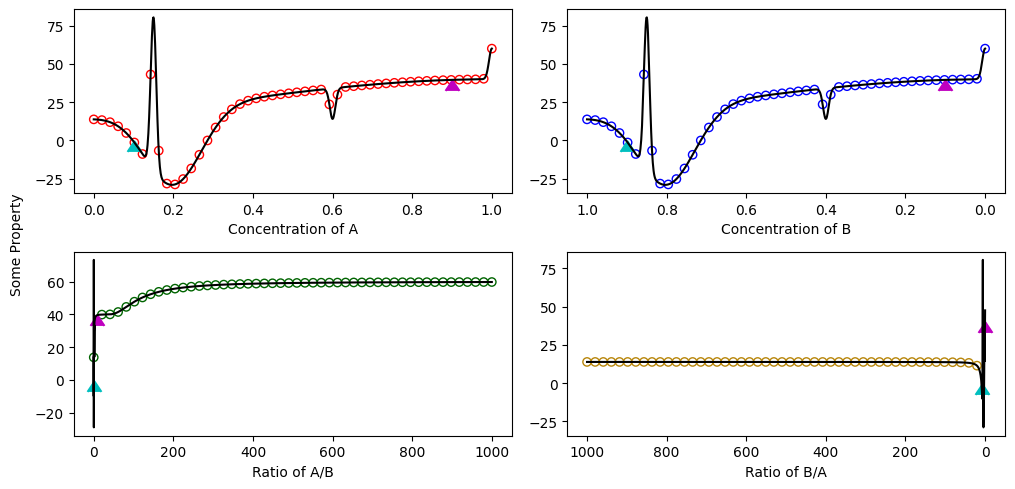

In [13]:
fig = plt.figure(figsize = (10,5))

fig.text(-0.01, 0.5, 'Some Property', va='center', rotation='vertical')

ax1 = fig.add_subplot(221)
ax1.scatter(A_comp_points, target, edgecolor= "r", marker = "o", facecolor="none")
ax1.plot(A_comp_vis, target_vis, "k")
#plot 90% A and 90% B
ax1.scatter(conc, val_at_conc, marker = 6, s = 100, c = "m")
ax1.scatter(1-B_conc, B_val_at_conc, marker = 6, s = 100, c = "c")
ax1.set_xlabel("Concentration of A")

ax2 = fig.add_subplot(222)
ax2.scatter(B_comp_points, B_target, edgecolor= "b", marker = "o", facecolor="none")
ax2.plot(B_comp_vis, B_target_vis, "k")
#plot 90% A and 90% B
ax2.scatter(1 - conc, val_at_conc, marker = 6, s = 100, c = "m")
ax2.scatter(B_conc, B_val_at_conc, marker = 6, s = 100, c = "c")
ax2.invert_xaxis()
ax2.set_xlabel("Concentration of B")

ax3 = fig.add_subplot(223)
ax3.scatter(comp_ratio, AB_target, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax3.plot(comp_ratio_vis, AB_target_vis, "k")
#plot 90% A and 90% B
ax3.scatter(concentration_to_ratio(conc), val_at_conc, marker = 6, s = 100, c = "m")
ax3.scatter(concentration_to_ratio(1-B_conc), B_val_at_conc, marker = 6, s = 100, c = "c")
ax3.set_xlabel("Ratio of A/B")

ax4 = fig.add_subplot(224)
ax4.scatter(comp_ratio, BA_target, edgecolor= "darkgoldenrod", marker = "o", facecolor="none")
ax4.plot(comp_ratio_vis, BA_target_vis, "k")
#plot 90% A and 90% B
ax4.scatter(concentration_to_ratio(1-conc), val_at_conc, marker = 6, s = 100, c = "m")
ax4.scatter(concentration_to_ratio(B_conc), B_val_at_conc, marker = 6, s = 100, c = "c")
ax4.invert_xaxis()
ax4.set_xlabel("Ratio of B/A")
plt.tight_layout()
plt.plot()


In the ratio of A/B all the detail below 90% A is obfuscated. \\
In the ratio of B/A all the detail above 10% A is obfuscated.

# Grain Size vs. Strength

In [14]:
def HallPetch(d, sigma_0, k):

  sigma = sigma_0 + k/np.sqrt(d)
  return sigma


def modifiedHallPetch(d, sigma_0, k_0, sigma_1, k_1):

  sigma_0 = HallPetch(d, sigma_0, k_0)
  sigma_1 = HallPetch(d**2, sigma_1, k_1)

  sigma = sigma_0 + sigma_1
  return sigma

[]

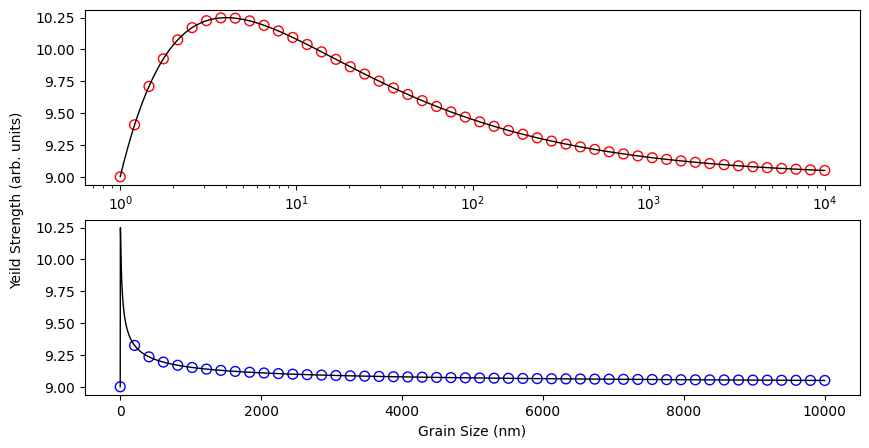

In [15]:
grain_sizes = np.geomspace(1, 10000, 50) # in nm
grain_size_lin = np.linspace(1, 10000, 50)
grain_size_view = np.geomspace(1, 10000, 1000)

sigma = modifiedHallPetch(grain_sizes, 10, 5, -1, -5)
sigma_lin = modifiedHallPetch(grain_size_lin, 10, 5, -1, -5)
sigma_view = modifiedHallPetch(grain_size_view, 10, 5, -1, -5)

fig = plt.figure(figsize = (10,5))
fig.text(0.05, 0.5, 'Yeild Strength (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(211)
ax1.scatter(grain_sizes, sigma, edgecolor= "r", marker = "o", facecolor="none", s = 50)
# ax1.scatter(grain_size_lin, sigma_lin, edgecolor= "b", marker = "o", facecolor="none", s=100)
# ax1.scatter(grain_sizes, sigma, color= "r", marker = "|")
# ax1.scatter(grain_size_lin, sigma_lin, color= "b", marker = "|")
ax1.plot(grain_size_view, sigma_view, "k", linewidth =1)
ax1.set_xscale("log")

ax2 = fig.add_subplot(212)
# ax2.scatter(grain_sizes, sigma, edgecolor= "r", marker = "o", facecolor="none")
ax2.scatter(grain_size_lin, sigma_lin, edgecolor= "b", marker = "o", facecolor="none", s=50)
# ax2.scatter(grain_sizes, sigma, color= "r", marker = "|")
# ax2.scatter(grain_size_lin, sigma_lin, color= "b", marker = "|")
ax2.plot(grain_size_view, sigma_view, "k", linewidth =1)
ax2.set_xscale("linear")
ax2.set_xlabel("Grain Size (nm)")

plt.plot()

# Temperature

In [16]:
kB = 1.380649e-23  #J/K

def Weibull(x, mu, alpha, gamma):
  intensity = (gamma/alpha)*((x - mu)/alpha)**(gamma -1) * np.exp(-((x-mu)/alpha)**gamma)
  return intensity

def tempfunction(beta, A=100, B=100, C=100000):

  # conductivity = A*beta*1e-25 * scipy.special.polygamma(1, C + B*beta) # from eq 6 in 10.1103/PhysRevB.96.054114
  T = 1/(kB * beta)
  conductivity_0 = 1/(A*T**2) # from eq 8 in 10.1103/PhysRevB.96.054114 for Gutzwiller Correlated Fermi Liquid

  conductivity_1 = 1/(B*T) # linear resistance at high T

  conductivity_2 = C*Weibull(T, 75, 100, 10) *0.0
  # conductivity_2 = 1/resistivity_2

  conductivity = conductivity_0 + conductivity_1 + conductivity_2
  return conductivity


[]

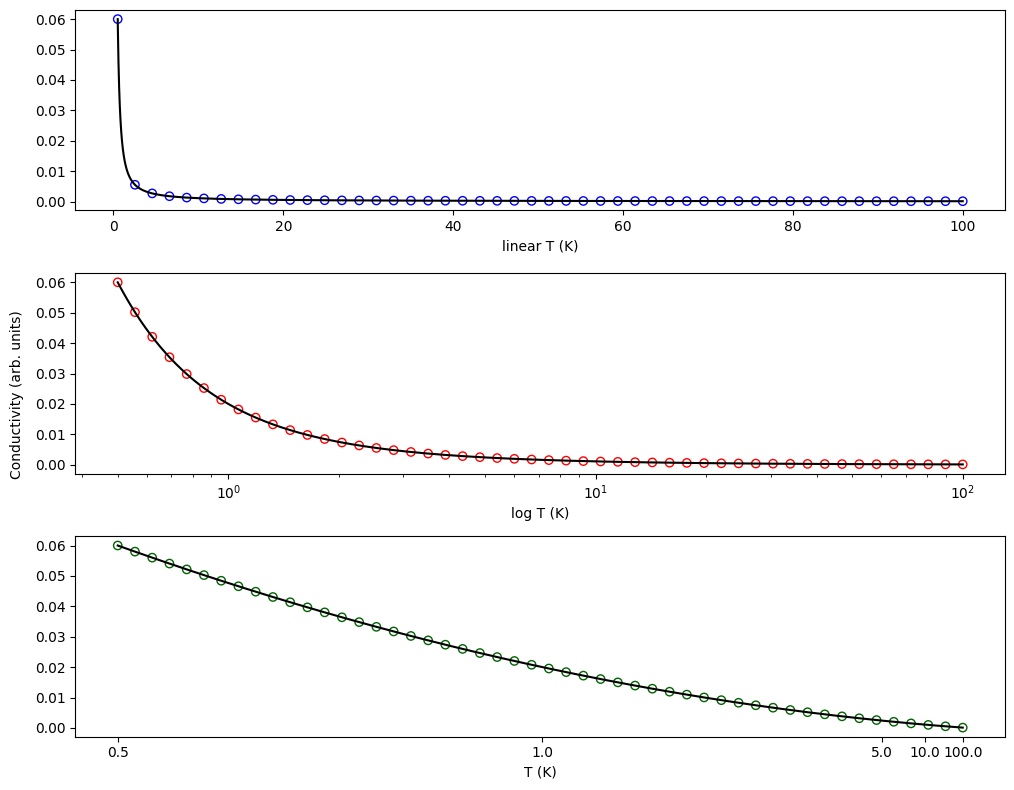

In [17]:
t_start = 0.5
t_end = 100
temperatures_geom = np.geomspace(t_start, t_end, 50)
temperatures_lin = np.linspace(t_start, t_end, 50)

betas = np.linspace(1/(kB*temperatures_geom[0]), 1/(kB*temperatures_geom[-1]), 50)
betas_geom = np.geomspace(1/(kB*temperatures_geom[0]), 1/(kB*temperatures_geom[-1]), 50)
betas_view = np.sort(np.concatenate([np.linspace(1/(kB*temperatures_geom[0]), 1/(kB*temperatures_geom[-1]), 500),
                                     1/(kB*np.linspace(t_start, t_end, 500)),
                                     1/(kB*np.geomspace(t_start, t_end, 500))]))

conductivity_geom = tempfunction( 1/(kB * temperatures_geom))
conductivity_lin = tempfunction( 1/(kB * temperatures_lin))
conductivity_betas = tempfunction(betas)
conductivity_betas_geom = tempfunction(betas_geom)
conductivity_betas_view = tempfunction(betas_view)


beta_ticks_labels = np.round(np.sort(np.concatenate((np.geomspace(1, 100, 3), np.geomspace(0.5, 5, 2)))),2)
beta_ticks = 1/(kB*beta_ticks_labels)

fig = plt.figure(figsize = (10,8))

fig.text(-0.01, 0.5, 'Conductivity (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(311)
ax1.scatter(temperatures_lin, conductivity_lin, edgecolor= "b", marker = "o", facecolor="none")
ax1.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax1.set_xlabel("linear T (K)")

ax2 = fig.add_subplot(312)
ax2.scatter(temperatures_geom, conductivity_geom, edgecolor= "r", marker = "o", facecolor="none")
ax2.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax2.set_xscale("log")
ax2.set_xlabel("log T (K)")




ax3 = fig.add_subplot(313)
ax3.scatter(betas, conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax3.plot(betas_view, conductivity_betas_view, "k")
ax3.set_xlabel("T (K)")
ax3.set_xticks(beta_ticks, beta_ticks_labels)
ax3.invert_xaxis()

plt.tight_layout()
plt.plot()


[]

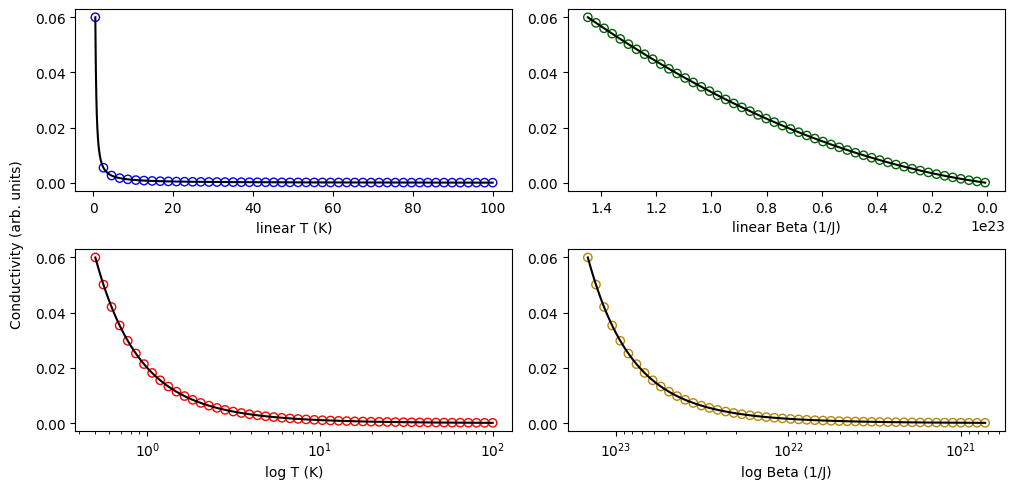

In [18]:
fig = plt.figure(figsize = (10,5))

fig.text(-0.01, 0.5, 'Conductivity (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(221)
ax1.scatter(temperatures_lin, conductivity_lin, edgecolor= "b", marker = "o", facecolor="none")
ax1.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax1.set_xlabel("linear T (K)")

ax2 = fig.add_subplot(223)
ax2.scatter(temperatures_geom, conductivity_geom, edgecolor= "r", marker = "o", facecolor="none")
ax2.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax2.set_xscale("log")
ax2.set_xlabel("log T (K)")




ax3 = fig.add_subplot(222)
ax3.scatter(betas, conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax3.plot(betas_view, conductivity_betas_view, "k")
ax3.set_xlabel("linear Beta (1/J)")
ax3.invert_xaxis()

ax4 = fig.add_subplot(224)
ax4.scatter(betas_geom, conductivity_betas_geom, edgecolor= "darkgoldenrod", marker = "o", facecolor="none")
ax4.plot(betas_view, conductivity_betas_view, "k")
ax4.set_xlabel("log Beta (1/J)")
ax4.set_xscale("log")
ax4.invert_xaxis()

plt.tight_layout()
plt.plot()

[]

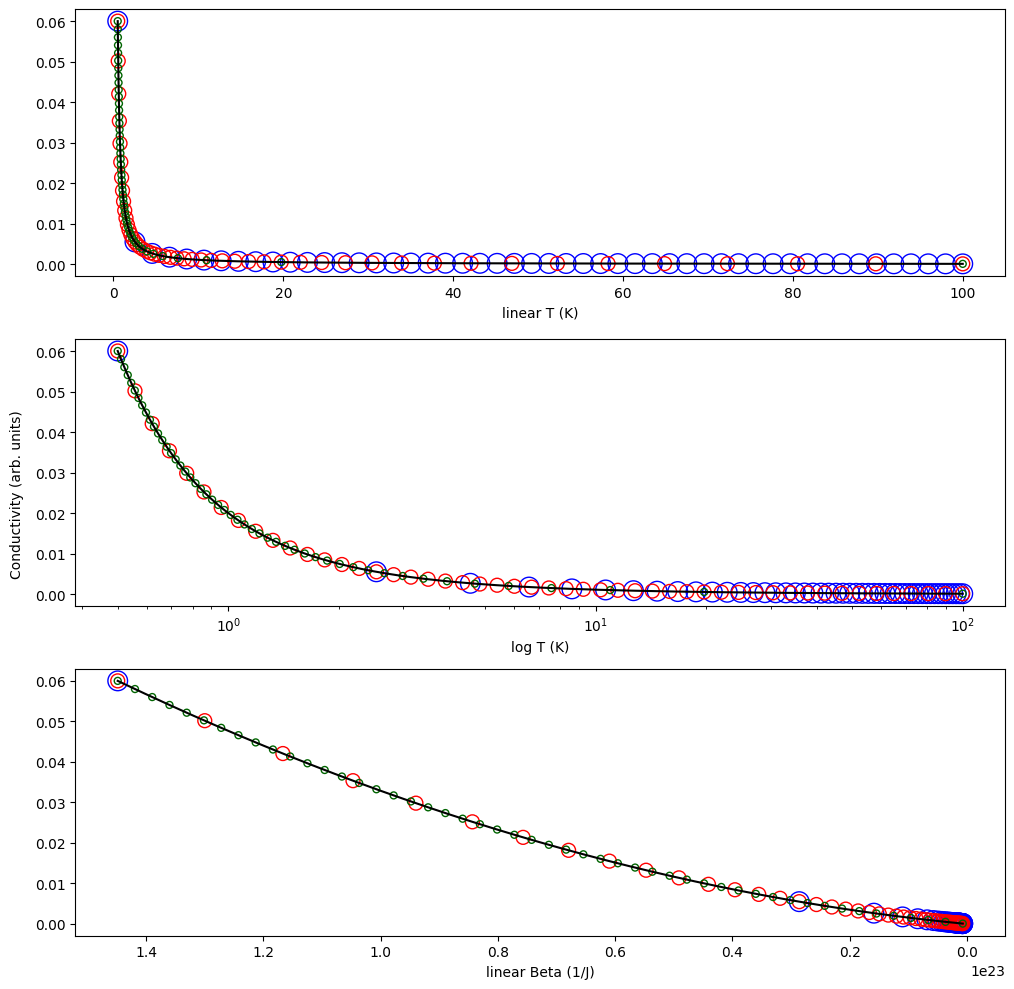

In [19]:
fig = plt.figure(figsize = (10,10))

fig.text(-0.01, 0.5, 'Conductivity (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(311)
ax1.scatter(temperatures_lin, conductivity_lin, edgecolor= "b", marker = "o", facecolor="none", s=200)
ax1.scatter(temperatures_geom, conductivity_geom, edgecolor= "r", marker = "o", facecolor="none", s=100)
ax1.scatter(1/(kB*betas), conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none", s=25)
ax1.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax1.set_xlabel("linear T (K)")

ax2 = fig.add_subplot(312)
ax2.scatter(temperatures_lin, conductivity_lin, edgecolor= "b", marker = "o", facecolor="none", s=200)
ax2.scatter(temperatures_geom, conductivity_geom, edgecolor= "r", marker = "o", facecolor="none", s=100)
ax2.scatter(1/(kB*betas), conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none", s=25)
ax2.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax2.set_xscale("log")
ax2.set_xlabel("log T (K)")




ax3 = fig.add_subplot(313)
ax3.scatter(1/(kB*temperatures_lin), conductivity_lin, edgecolor= "b", marker = "o", facecolor="none", s=200)
ax3.scatter(1/(kB*temperatures_geom), conductivity_geom, edgecolor= "r", marker = "o", facecolor="none", s=100)
ax3.scatter(betas, conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none", s=25)
ax3.plot(betas_view, conductivity_betas_view, "k")
ax3.set_xlabel("linear Beta (1/J)")
ax3.invert_xaxis()

plt.tight_layout()
plt.plot()


## Phase change


In [20]:
def phase_step(T, a= 1, b =300 ):

  x = 1/(kB * T)
  B = 1/(kB * b)
  A = a * kB*10000
  # z = 1 - scipy.special.erf(a* (T-b))
  z =  scipy.special.erf(A* (x-B)) +1

  return z

[]

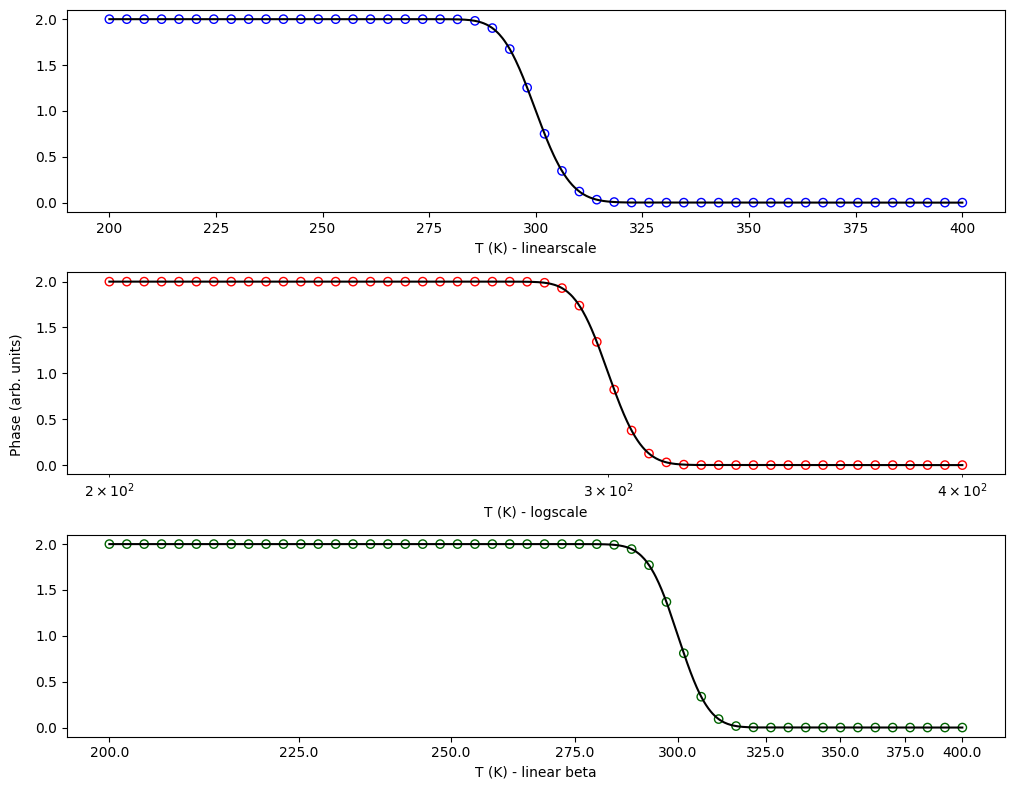

In [21]:
t_start = 200
t_end = 400
p_temperatures_geom = np.geomspace(t_start, t_end, 50)
p_temperatures_lin = np.linspace(t_start, t_end, 50)

p_betas = np.linspace(1/(kB*p_temperatures_geom[0]), 1/(kB*p_temperatures_geom[-1]), 50)
p_betas_geom = np.geomspace(1/(kB*p_temperatures_geom[0]), 1/(kB*p_temperatures_geom[-1]), 50)
p_betas_view = np.sort(np.concatenate([np.linspace(1/(kB*p_temperatures_geom[0]), 1/(kB*p_temperatures_geom[-1]), 500),
                                     1/(kB*np.linspace(t_start, t_end, 500)),
                                     1/(kB*np.geomspace(t_start, t_end, 500))]))

phase_geom = phase_step(p_temperatures_geom)
phase_lin = phase_step(p_temperatures_lin)
phase_betas = phase_step(1/(kB*p_betas))
phase_betas_geom = phase_step(1/(kB * p_betas_geom))
phase_betas_view = phase_step(1/(kB*p_betas_view))

# beta_ticks =  np.linspace(1/(kB*temperatures_geom[0]), 1/(kB*temperatures_geom[-1]), 5)
# beta_ticks_labels = 1/(kB*beta_ticks)

p_beta_ticks_labels = np.linspace(t_start, t_end, 9)
p_beta_ticks = 1/(kB*p_beta_ticks_labels)

fig = plt.figure(figsize = (10,8))

fig.text(-0.01, 0.5, 'Phase (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(311)
ax1.scatter(p_temperatures_lin, phase_lin, edgecolor= "b", marker = "o", facecolor="none")
ax1.plot(1/(kB*p_betas_view), phase_betas_view, "k")
ax1.set_xlabel("T (K) - linearscale")

ax2 = fig.add_subplot(312)
ax2.scatter(p_temperatures_geom, phase_geom, edgecolor= "r", marker = "o", facecolor="none")
ax2.plot(1/(kB*p_betas_view), phase_betas_view, "k")
ax2.set_xscale("log")
ax2.set_xlabel("T (K) - logscale")




ax3 = fig.add_subplot(313)
ax3.scatter(p_betas, phase_betas, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax3.plot(p_betas_view, phase_betas_view, "k")
ax3.set_xlabel("T (K) - linear beta")
ax3.set_xticks(p_beta_ticks, p_beta_ticks_labels)
ax3.invert_xaxis()

plt.tight_layout()
plt.plot()

In [22]:
from matplotlib import ticker

[]

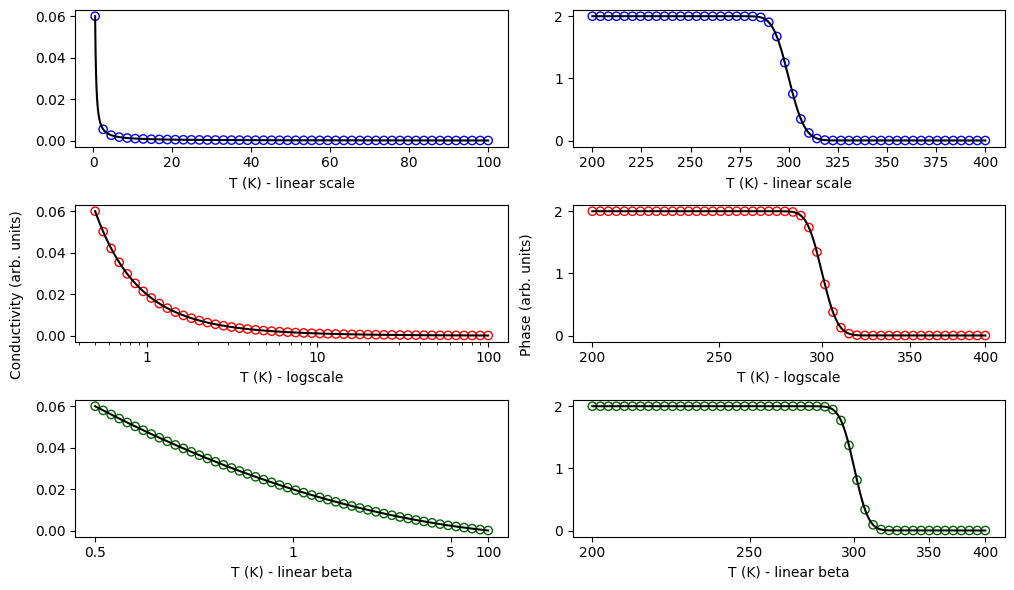

In [24]:
beta_ticks_labels = np.array([0.5, 1, 5, 100])
beta_ticks = 1/(kB*beta_ticks_labels)
beta_ticks_labels = [0.5, 1, 5, 100]

fig = plt.figure(figsize = (10,6))

fig.text(-0.01, 0.5, 'Conductivity (arb. units)', va='center', rotation='vertical')

ax1 = fig.add_subplot(321)
ax1.scatter(temperatures_lin, conductivity_lin, edgecolor= "b", marker = "o", facecolor="none")
ax1.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax1.set_xlabel("T (K) - linear scale")

ax4 = fig.add_subplot(322)
ax4.scatter(p_temperatures_lin, phase_lin, edgecolor= "b", marker = "o", facecolor="none")
ax4.plot(1/(kB*p_betas_view), phase_betas_view, "k")
ax4.set_xlabel("T (K) - linear scale")

ax2 = fig.add_subplot(323)
ax2.scatter(temperatures_geom, conductivity_geom, edgecolor= "r", marker = "o", facecolor="none")
ax2.plot(1/(kB*betas_view), conductivity_betas_view, "k")
ax2.set_xscale("log")
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set_xlabel("T (K) - logscale")

ax5 = fig.add_subplot(324)
ax5.scatter(p_temperatures_geom, phase_geom, edgecolor= "r", marker = "o", facecolor="none")
ax5.plot(1/(kB*p_betas_view), phase_betas_view, "k")
ax5.set_xscale("log")
ax5.set_xticks(np.array([200, 250, 300, 350, 400]), np.array([200, 250, 300, 350, 400]))
ax5.set_xlabel("T (K) - logscale")


ax3 = fig.add_subplot(325)
ax3.scatter(betas, conductivity_betas, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax3.plot(betas_view, conductivity_betas_view, "k")
ax3.set_xlabel("T (K) - linear beta")
ax3.set_xticks(beta_ticks, beta_ticks_labels)
ax3.invert_xaxis()

p_beta_ticks_labels = np.array([200, 250, 300, 350, 400])
p_beta_ticks = 1/(kB*p_beta_ticks_labels)

fig.text(0.5, 0.5, 'Phase (arb. units)', va='center', rotation='vertical')

ax6 = fig.add_subplot(326)
ax6.scatter(p_betas, phase_betas, edgecolor= "darkgreen", marker = "o", facecolor="none")
ax6.plot(p_betas_view, phase_betas_view, "k")
ax6.set_xlabel("T (K) - linear beta")
ax6.set_xticks(p_beta_ticks, p_beta_ticks_labels)
ax6.invert_xaxis()

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.plot()

# Data Scaling

Data scaling is an important numerical consideration - but must be done with care.

In [25]:
def spectra_generator(x):
  two_theta = np.linspace(10, 180, 1000).reshape(1,-1)

  A = 100*x + 30
  B = 100*(1-x) + 30
  C = 100*(x == 0.5)

  mu_a = 60+2*x
  mu_b = 40+2*x

  y1 = gaussian(two_theta, A= A, mu = mu_a, sigma = 3)
  y2 = gaussian(two_theta, A= 0.4*A, mu = 2*mu_a, sigma = 3)
  y3 = gaussian(two_theta, A= B, mu = mu_b, sigma = 3)
  y4 = gaussian(two_theta, A= 0.1*B, mu = mu_b*5/3, sigma = 3)
  y5 = gaussian(two_theta, A= 0.2*B, mu = 2*mu_b, sigma = 3)
  y6 = gaussian(two_theta, A= C, mu = 150, sigma = 3)

  y = y1 + y2 + y3 + y4 + y5 + y6 + 20

  y_noisy = np.random.poisson(10*y, (x.shape[0], y.shape[1]))
  return y_noisy

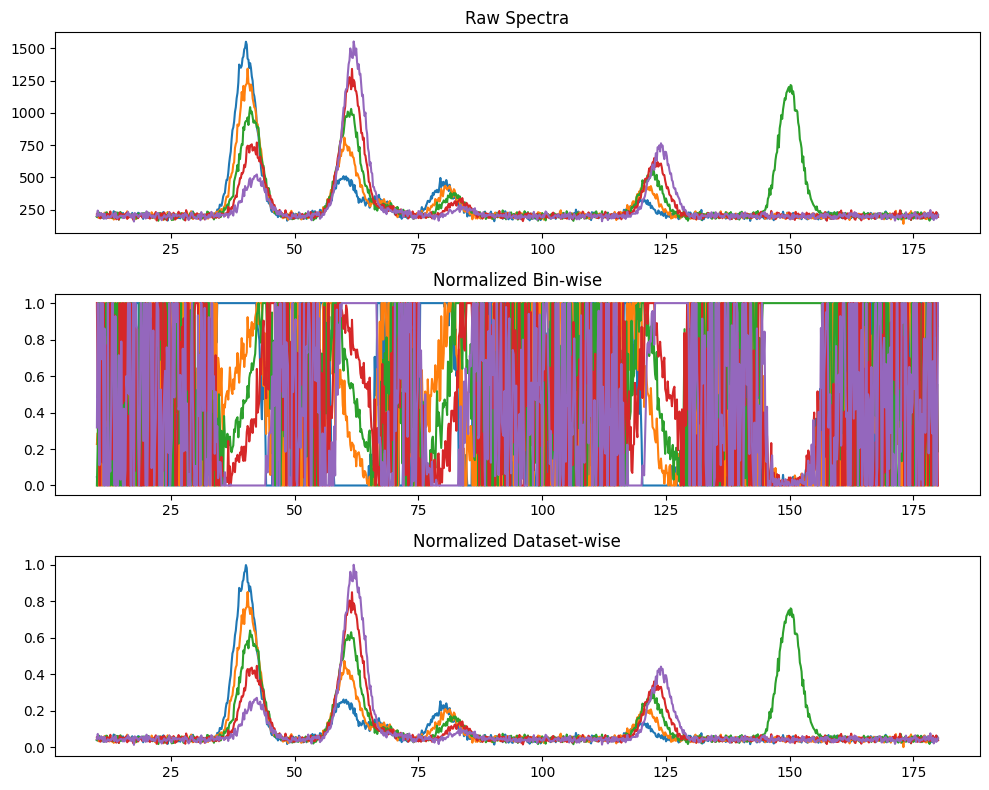

In [26]:
two_theta = np.linspace(10, 180, 1000).reshape(1,-1)

#Raw data
x_array = np.linspace(0, 1, 5).reshape(-1,1)
spec_array = spectra_generator(x_array)
spec_array

#Bin-wise 0-1 normalize
binwise_norm_spec_max = np.max(spec_array, axis = 0)
binwise_norm_spec_min = np.min(spec_array, axis = 0)
binwise_norm_spec = (spec_array - binwise_norm_spec_min)/(binwise_norm_spec_max - binwise_norm_spec_min)

#Bin-wise mean/variance normalize
binwise_spec_mean = np.mean(spec_array, axis = 0)
binwise_spec_std = np.std(spec_array, axis = 0)
binwise_mv_spec = (spec_array - binwise_spec_mean)/(binwise_spec_std)

#Pattern-wsie 0-1 normalize
pattern_wise_max = np.max(spec_array, axis = 1).reshape(-1,1)
pattern_wise_min = np.min(spec_array, axis = 1).reshape(-1,1)
pattern_norm_spec = (spec_array - pattern_wise_min)/(pattern_wise_max - pattern_wise_min)


#Dataset-wise normalize
norm_spec_max = np.max(spec_array)
norm_spec_min = np.min(spec_array)
norm_spec = (spec_array - norm_spec_min)/(norm_spec_max - norm_spec_min)


two_theta_array = np.repeat(two_theta, x_array.shape[0], axis = 0)

fig = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(311)
ax1.plot(two_theta_array.T, spec_array.T)
ax1.title.set_text("Raw Spectra")

ax2 = fig.add_subplot(312)
ax2.plot(two_theta_array.T, binwise_norm_spec.T)
ax2.title.set_text("Normalized Bin-wise")

ax3 = fig.add_subplot(313)
ax3.plot(two_theta_array.T, norm_spec.T)
ax3.title.set_text("Normalized Dataset-wise")

plt.tight_layout()
plt.show()

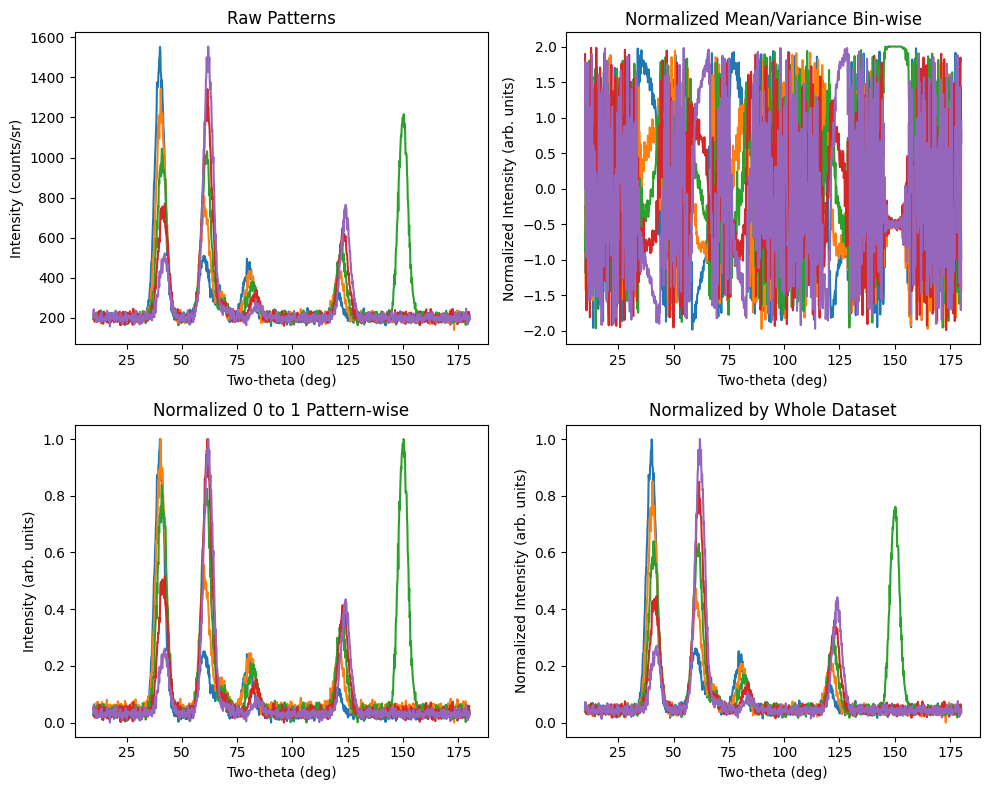

In [27]:
fig = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(221)
ax1.plot(two_theta_array.T, spec_array.T)
ax1.title.set_text("Raw Patterns")
ax1.set_xlabel("Two-theta (deg)")
ax1.set_ylabel("Intensity (counts/sr)")

# ax2 = fig.add_subplot(222)
# ax2.plot(two_theta_array.T, binwise_norm_spec.T)
# ax2.title.set_text("Normalized 0-1 Bin-wise")
# ax2.set_xlabel("Two-theta (deg)")
# ax2.set_ylabel("Intensity (arb. units)")

ax2 = fig.add_subplot(223)
ax2.plot(two_theta_array.T, pattern_norm_spec.T)
ax2.title.set_text("Normalized 0 to 1 Pattern-wise")
ax2.set_xlabel("Two-theta (deg)")
ax2.set_ylabel("Intensity (arb. units)")

ax3 = fig.add_subplot(222)
ax3.plot(two_theta_array.T, binwise_mv_spec.T)
ax3.title.set_text("Normalized Mean/Variance Bin-wise")
ax3.set_xlabel("Two-theta (deg)")
ax3.set_ylabel("Normalized Intensity (arb. units)")

ax4 = fig.add_subplot(224)
ax4.plot(two_theta_array.T, norm_spec.T)
ax4.title.set_text("Normalized by Whole Dataset")
ax4.set_xlabel("Two-theta (deg)")
ax4.set_ylabel("Normalized Intensity (arb. units)")

plt.tight_layout()
plt.show()

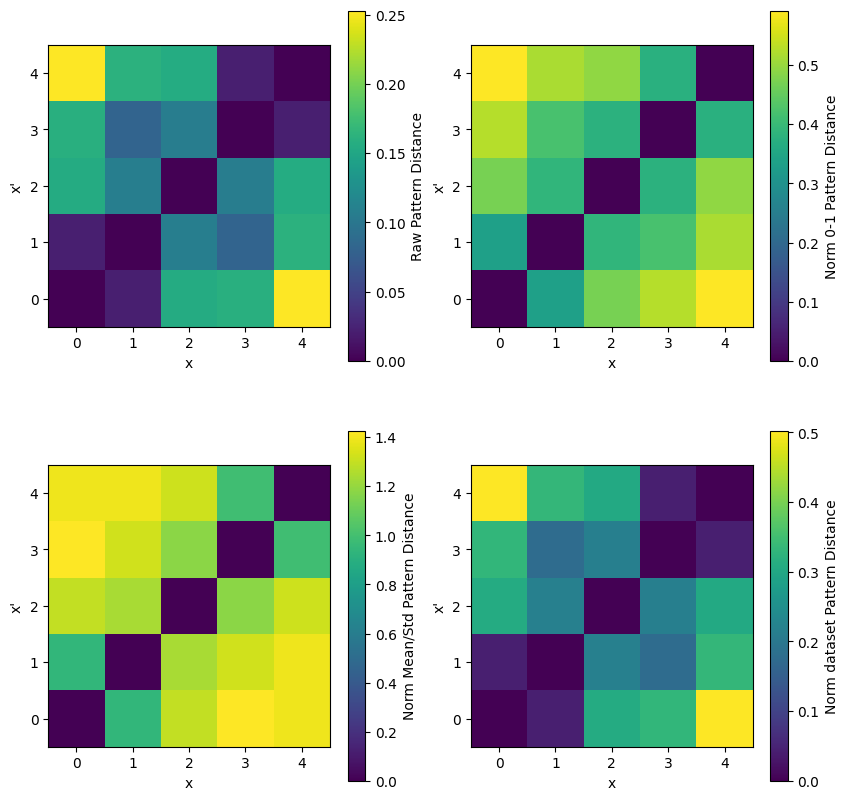

In [28]:
pattern_index = np.arange(len(spec_array[:,0]))
raw_dist_table = pairwise_distances(spec_array, metric = "cosine")
dist_table_01 = pairwise_distances(binwise_norm_spec, metric = "cosine")
dist_table_mv = pairwise_distances(binwise_mv_spec, metric = "cosine")
dist_table_norm = pairwise_distances(norm_spec, metric = "cosine")


plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
plt.pcolormesh(pattern_index.reshape(-1),
               pattern_index.reshape(-1).T,
               raw_dist_table)
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar(label = "Raw Pattern Distance")
ax1.set_aspect("equal")

ax2 = plt.subplot(222)
plt.pcolormesh(pattern_index.reshape(-1),
               pattern_index.reshape(-1).T,
               dist_table_01)
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar(label = "Norm 0-1 Pattern Distance")
ax2.set_aspect("equal")

ax3 = plt.subplot(223)
plt.pcolormesh(pattern_index.reshape(-1),
               pattern_index.reshape(-1).T,
               dist_table_mv)
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar(label = "Norm Mean/Std Pattern Distance")
ax3.set_aspect("equal")

ax4 = plt.subplot(224)
plt.pcolormesh(pattern_index.reshape(-1),
               pattern_index.reshape(-1).T,
               dist_table_norm)
plt.xlabel("x")
plt.ylabel("x'")
plt.colorbar(label = "Norm dataset Pattern Distance")
ax4.set_aspect("equal")
plt.show()

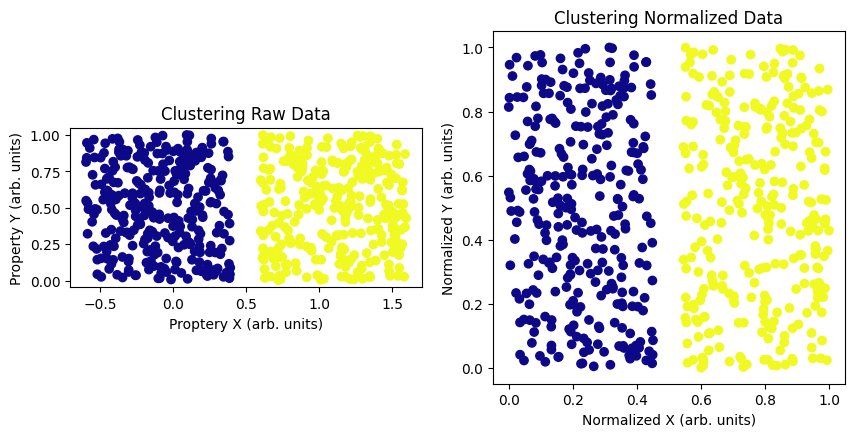

In [30]:
np.random.seed(1)

seporation = 1.2

xAmp = 1
yAmp = 1

circle1x = np.random.uniform(0, xAmp, 300) + seporation/2
circle1y = np.random.uniform(0, yAmp, 300)
circle2x = np.random.uniform(0, xAmp, 300) - seporation/2
circle2y = np.random.uniform(0, yAmp, 300)

circlex = np.concatenate((circle1x, circle2x))
circley = np.concatenate((circle1y, circle2y))

max_x = np.max(circlex)
min_x = np.min(circlex)
max_y = np.max(circley)
min_y = np.min(circley)

norm_circlex = (circlex - min_x)/(max_x - min_x)
norm_circley = (circley - min_y)/(max_y - min_y)

cluster = KMeans(n_clusters=2, random_state=0, n_init= 1).fit(np.array([circlex, circley]).T)
labels = cluster.labels_.astype(int)

norm_cluster = KMeans(n_clusters=2, random_state=0, n_init= 1).fit(np.array([norm_circlex, norm_circley]).T)
norm_labels = norm_cluster.labels_.astype(np.float32)


fig = plt.figure(figsize = (10,8))

# ax2 = fig.add_subplot(312)
ax2 = fig.add_subplot(121)
ax2.scatter(circlex, circley, marker = "o", c = labels, cmap="plasma")
ax2.set_aspect("equal")
ax2.title.set_text("Clustering Raw Data")
ax2.set_xlabel("Proptery X (arb. units)")
ax2.set_ylabel("Property Y (arb. units)")

# ax3 = fig.add_subplot(313)
ax3 = fig.add_subplot(122)
ax3.scatter(norm_circlex, norm_circley, marker = "o", c = norm_labels, cmap="plasma")
ax3.set_aspect("equal")
ax3.title.set_text("Clustering Normalized Data")
ax3.set_xlabel("Normalized X (arb. units)")
ax3.set_ylabel("Normalized Y (arb. units)")

plt.show()


# Model Design

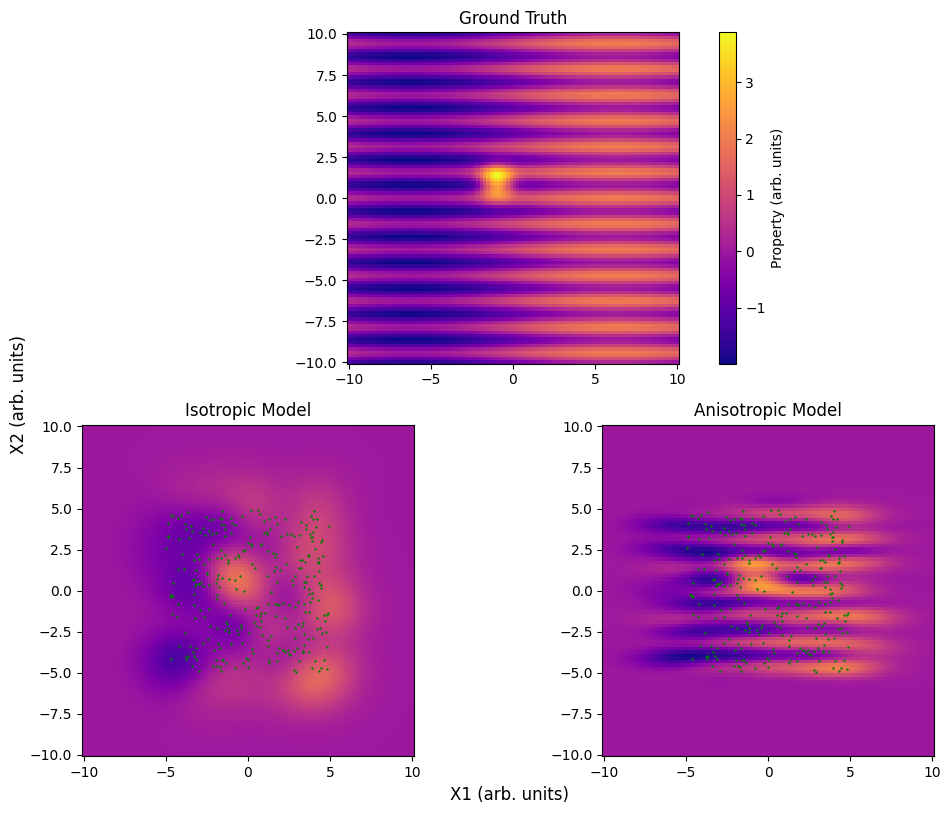

In [32]:
np.random.seed(1)


min_domain = -10
max_domain = 10
size = 100
x_spacing = np.linspace(min_domain, max_domain, size)
y_spacing = np.linspace(min_domain, max_domain, size)
x_grid, y_grid = np.meshgrid(x_spacing, y_spacing)

x_grid = x_grid.reshape(-1,1)
y_grid = y_grid.reshape(-1,1)

def twoD_waves(x,y, noise):
  z_x = np.sin(x/4)
  z_y = np.cos(4*y)

  z_p1 = gaussian(x, A = 2, mu = -1, sigma = 1)
  z_p2 = gaussian(y, A = 2, mu = 1, sigma = 1)

  z_noise = np.random.normal(0, noise, x.shape)

  z = z_x + z_y + z_p1*z_p2 + z_noise

  return z

z = twoD_waves(x_grid, y_grid, noise = 0 )

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=np.min(z), vmax=np.max(z))

color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

measuremets = 300
x_measured = np.random.uniform(0.5*min_domain, 0.5*max_domain, measuremets).reshape(-1,1)
y_measured = np.random.uniform(0.5*min_domain, 0.5*max_domain, measuremets).reshape(-1,1)
xy_measured = np.concatenate((x_measured, y_measured), axis = 1)
z_measured = twoD_waves(x_measured, y_measured, noise = 0.25)

#Train an Isotropic Model
kernel = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1., ARD=False)
iso_m = GPy.models.GPRegression(xy_measured, z_measured, kernel)
iso_m.optimize()

mean_iso, var_iso = iso_m.predict(np.concatenate((x_grid, y_grid), axis = 1))

#Train an ARD Model
kernel_ard = GPy.kern.RBF(input_dim=2, variance=1., lengthscale=1., ARD=True)
ard_m = GPy.models.GPRegression(xy_measured, z_measured, kernel_ard)
ard_m.optimize()

mean_ard, var_ard = ard_m.predict(np.concatenate((x_grid, y_grid), axis = 1))


#Plot Ground Truth, Isotropic Model, and ARD Model
fig = plt.figure(figsize = (10,8))
gs0 = gridspec.GridSpec(2, 1, height_ratios=[1, 1], width_ratios=[1])

gs_top = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0], width_ratios=[14,1])
ax1 = plt.subplot(gs_top[0])
ax1.pcolormesh(x_spacing, y_spacing, z.reshape(size,size), cmap = "plasma")
ax1.set_aspect("equal")
ax1.set_title("Ground Truth")

gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1])
ax2 = plt.subplot(gs[0])
ax2.pcolormesh(x_spacing, y_spacing, mean_iso.reshape(size,size), cmap = "plasma", vmin = np.min(z), vmax = np.max(z))
ax2.scatter(x_measured, y_measured, c = 'g', s = 0.5)
ax2.set_aspect("equal")
ax2.title.set_text("Isotropic Model")

ax3 = plt.subplot(gs[1])
ax3.pcolormesh(x_spacing, y_spacing, mean_ard.reshape(size,size), cmap = "plasma", vmin = np.min(z), vmax = np.max(z))
ax3.scatter(x_measured, y_measured, c = 'g', s = 0.5)
ax3.set_aspect("equal")
ax3.title.set_text("Anisotropic Model")

fig.colorbar(color_map, label='Property (arb. units)', ax=ax1)

fig.tight_layout()
fig.text(0.01, 0.5, 'X2 (arb. units)', size = "large", va='center', rotation='vertical')
fig.text(0.45, 0.0, 'X1 (arb. units)',size = "large", va='center', )

plt.show()

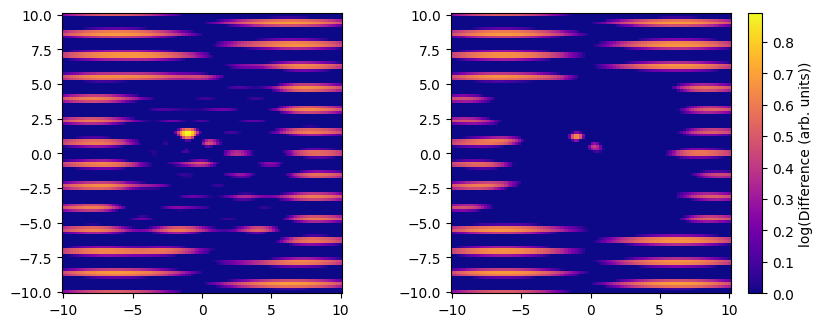

In [33]:
rmse_iso = np.log(np.abs((mean_iso - z)))
rmse_ard = np.log(np.abs((mean_ard - z)))


fig = plt.figure(figsize = (10,8))

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=np.max([rmse_iso, rmse_ard]))

color_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

ax1 = fig.add_subplot(221)
ax1.pcolormesh(x_spacing, y_spacing, rmse_iso.reshape(size,size), cmap = "plasma", vmin=0, vmax=np.max([rmse_iso, rmse_ard]))
ax1.set_aspect("equal")

ax2 = fig.add_subplot(222)
ax2.pcolormesh(x_spacing, y_spacing, rmse_ard.reshape(size,size), cmap = "plasma", vmin=0, vmax=np.max([rmse_iso, rmse_ard]))
ax2.set_aspect("equal")

fig.colorbar(color_map, label='log(Difference (arb. units))', ax=ax2)
plt.show()

In [34]:
print(np.min(rmse_iso), np.max([rmse_iso, rmse_ard]))
print(np.min(rmse_ard), np.max([rmse_iso, rmse_ard]))

-10.920183815936213 0.8910367975347843
-10.314010949740943 0.8910367975347843


In [35]:
#Total RMSE
print("Global RSME")
print("isotropic RMSE", np.sqrt(mean_squared_error(z, mean_iso)))
print("anisotropic RMSE", np.sqrt(mean_squared_error(z, mean_ard)))

#RMSE in measured region (+/- 5, +/- 5)

filter_1 = x_grid >= -5
filter_2 = x_grid <= 5
filter_3 = y_grid >= -5
filter_4 = y_grid <= 5

filter = filter_1*filter_2*filter_3*filter_4

z_filtered = z[filter]
mean_iso_filtered = mean_iso[filter]
mean_ard_filtered = mean_ard[filter]
print("Local RMSE")
print("isotropic RMSE", np.sqrt(mean_squared_error(z_filtered, mean_iso_filtered)))
print("anisotropic RMSE", np.sqrt(mean_squared_error(z_filtered, mean_ard_filtered)))

Global RSME
isotropic RMSE 0.9544709749511949
anisotropic RMSE 0.8614282543813176
Local RMSE
isotropic RMSE 0.7538757796583497
anisotropic RMSE 0.29116295174378276
